In [1]:

# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:

# get data of electricity_consumption from a .csv-file:
df01 = pd.read_csv("Electricity_ConsumptionAndProduction.csv")


In [3]:

df01


,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
...,...,...,...,...,...,...,...,...,...,...
36767,2023-03-12 19:00:00,6500,6643,1407,111,3084,933,1047,0,60
36768,2023-03-12 20:00:00,6471,6484,1408,58,2983,933,1042,0,60
36769,2023-03-12 21:00:00,6194,6413,1406,39,2938,935,1031,0,62
36770,2023-03-12 22:00:00,5708,6217,1406,8,2823,917,1001,0,61


In [4]:

df01.shape


(36772, 10)

In [5]:

df01.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36772 entries, 0 to 36771
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       36772 non-null  object
 1   Consumption    36772 non-null  int64 
 2   Production     36772 non-null  int64 
 3   Nuclear        36772 non-null  int64 
 4   Wind           36772 non-null  int64 
 5   Hydroelectric  36772 non-null  int64 
 6   Oil and Gas    36772 non-null  int64 
 7   Coal           36772 non-null  int64 
 8   Solar          36772 non-null  int64 
 9   Biomass        36772 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 2.8+ MB


In [6]:

# no null-values to control:
df01.isnull().sum()


DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64

In [7]:

# are there any duplicates
df01["DateTime"].value_counts()[0:10]


DateTime
2021-10-31 03:00:00    3
2019-10-27 03:00:00    3
2020-10-25 03:00:00    3
2022-10-30 03:00:00    3
2021-10-18 11:00:00    1
2021-10-18 06:00:00    1
2021-10-18 07:00:00    1
2021-10-18 08:00:00    1
2021-10-18 09:00:00    1
2021-10-18 10:00:00    1
Name: count, dtype: int64

In [8]:

# check duplicate value in detail:
df01[df01.DateTime == "2021-10-31 03:00:00"]


,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
24820,2021-10-31 03:00:00,5351,5265,1414,108,961,1314,1411,0,56
24821,2021-10-31 03:00:00,5341,5258,1415,141,934,1314,1393,0,58
24822,2021-10-31 03:00:00,5341,5258,1415,141,934,1314,1393,0,58


In [9]:

# delete all duplicates in the column "DateTime"
df01.drop_duplicates(inplace=True,keep=False)


In [10]:
df01.sample(10)

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
10052,2020-02-23 19:00:00,7440,7747,1425,1633,2265,1294,1064,0,67
11853,2020-05-08 21:00:00,6682,5301,1415,192,2295,719,633,0,49
10185,2020-02-29 08:00:00,7166,6936,1427,1180,1735,1329,972,236,55
31633,2022-08-10 23:00:00,5724,6611,1124,2168,1092,1015,1147,0,63
3319,2019-05-19 08:00:00,5389,5989,682,191,3224,459,1152,258,23
12856,2020-06-19 16:00:00,6734,6886,1396,475,3131,864,607,375,36
22630,2021-07-31 21:00:00,7410,6924,1352,1418,1807,934,1350,0,62
5870,2019-09-02 15:00:00,7651,6878,1312,633,1527,1142,1630,583,48
1932,2019-03-22 12:00:00,7352,7806,1343,893,2078,1204,1408,834,45
29607,2022-05-18 13:00:00,6537,8172,700,2558,2215,1150,930,558,60


In [11]:

# check wether the cleaning was successful
df01["DateTime"].value_counts()


DateTime
2019-01-01 00:00:00    1
2021-10-18 11:00:00    1
2021-10-18 05:00:00    1
2021-10-18 06:00:00    1
2021-10-18 07:00:00    1
                      ..
2020-05-25 10:00:00    1
2020-05-25 09:00:00    1
2020-05-25 08:00:00    1
2020-05-25 07:00:00    1
2023-03-12 23:00:00    1
Name: count, Length: 36764, dtype: int64

In [12]:
df01.shape

(36764, 10)

In [13]:

# check the indices --> they are not consecutive
df01.index


Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       36762, 36763, 36764, 36765, 36766, 36767, 36768, 36769, 36770, 36771],
      dtype='int64', length=36764)

In [14]:

# create new and correct indices
# --> useable dataframe for working with time series
df01.reset_index(drop=True,inplace=True)


In [15]:
df01

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
...,...,...,...,...,...,...,...,...,...,...
36759,2023-03-12 19:00:00,6500,6643,1407,111,3084,933,1047,0,60
36760,2023-03-12 20:00:00,6471,6484,1408,58,2983,933,1042,0,60
36761,2023-03-12 21:00:00,6194,6413,1406,39,2938,935,1031,0,62
36762,2023-03-12 22:00:00,5708,6217,1406,8,2823,917,1001,0,61


In [16]:

# get the data for the year 2019:
list_2019 = []
for i in df01.DateTime:
    if "2019" in i:
        list_2019.append(i)
        
len(list_2019)


8759

In [17]:

# select only a part of the data set to analyze:
df02 = df01.iloc[:(len(list_2019)),:3]


In [18]:

df02


,DateTime,Consumption,Production
0,2019-01-01 00:00:00,6352,6527
1,2019-01-01 01:00:00,6116,5701
2,2019-01-01 02:00:00,5873,5676
3,2019-01-01 03:00:00,5682,5603
4,2019-01-01 04:00:00,5557,5454
...,...,...,...
8754,2019-12-31 19:00:00,7719,7953
8755,2019-12-31 20:00:00,7491,7741
8756,2019-12-31 21:00:00,7065,7279
8757,2019-12-31 22:00:00,6777,7026


In [19]:

# possibility --> make the column "DateTime" an index column:
# df02 = df02.set_index('DateTime')


In [20]:

# convert to an date-format:
df02.DateTime = pd.to_datetime(df02.DateTime)


In [21]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     8759 non-null   datetime64[ns]
 1   Consumption  8759 non-null   int64         
 2   Production   8759 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 205.4 KB


Text(0.5, 0, 'Date')

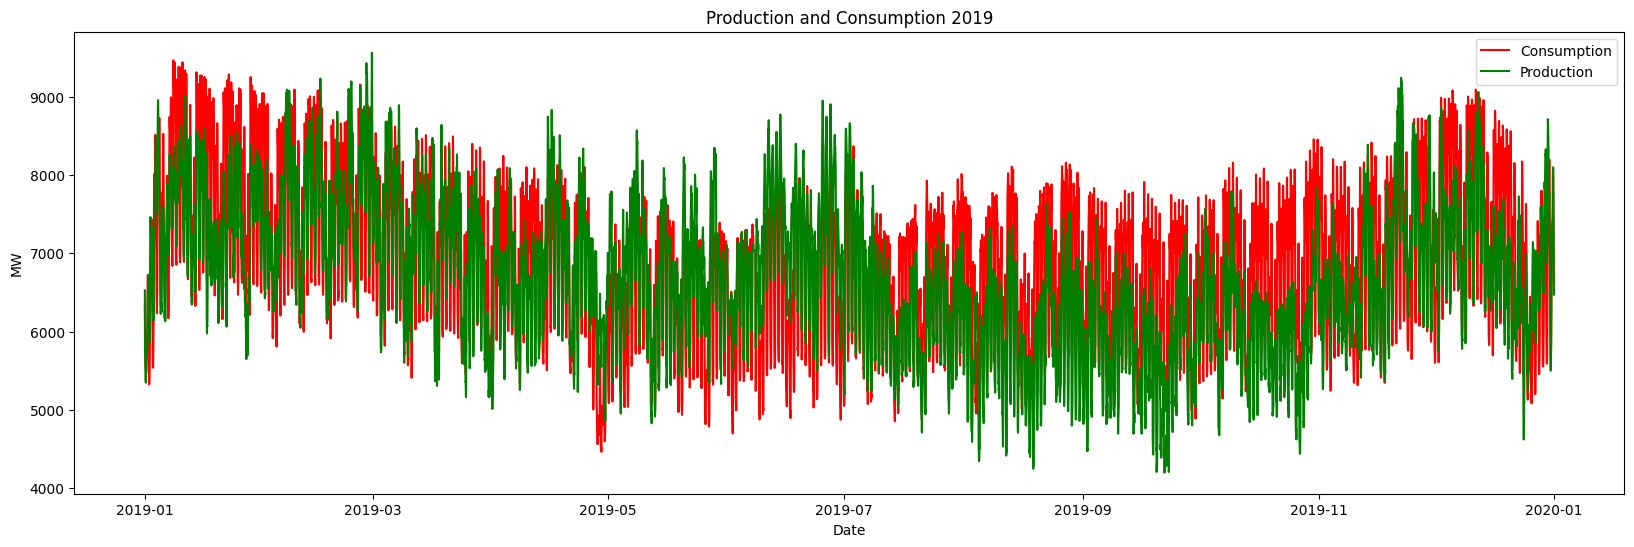

In [22]:

# visualization:
plt.figure(figsize=(20,6))
plt.plot(df02.DateTime,df02.Consumption,"r")
plt.plot(df02.DateTime,df02.Production,"g")
plt.title("Production and Consumption 2019")
plt.legend(['Consumption','Production'])
plt.ylabel("MW")
plt.xlabel("Date")


In [23]:

# analysis of the hours --> create a feature "TimesInHours"
df02['TimesInHours'] = df02.DateTime.dt.hour


In [24]:

df02.sample(5)


,DateTime,Consumption,Production,TimesInHours
95,2019-01-04 23:00:00,7065,7147,23
1178,2019-02-19 02:00:00,6341,6850,2
5899,2019-09-03 20:00:00,7834,6547,20
8168,2019-12-07 09:00:00,8150,7386,9
6348,2019-09-22 13:00:00,5447,4675,13


In [25]:

# consumption and production --> average values by hour
df02byHour = df02.groupby('TimesInHours').mean()


In [26]:

df02byHour


,DateTime,Consumption,Production
TimesInHours,,,
0,2019-07-02 00:00:00.000000000,6097.668493,6318.578082
1,2019-07-02 01:00:00.000000000,5886.920548,6075.704110
2,2019-07-02 02:00:00.000000000,5766.580822,5993.682192
3,2019-07-02 09:07:54.725274880,5720.098901,5949.793956
4,2019-07-02 04:00:00.000000000,5751.090411,5944.994521
5,2019-07-02 05:00:00.000000000,5869.328767,5990.950685
6,2019-07-02 06:00:00.000000000,6202.641096,6071.180822
7,2019-07-02 07:00:00.000000000,6779.153425,6528.783562
8,2019-07-02 08:00:00.000000000,7213.780822,6826.345205


Text(0.5, 0, 'TimesInHours')

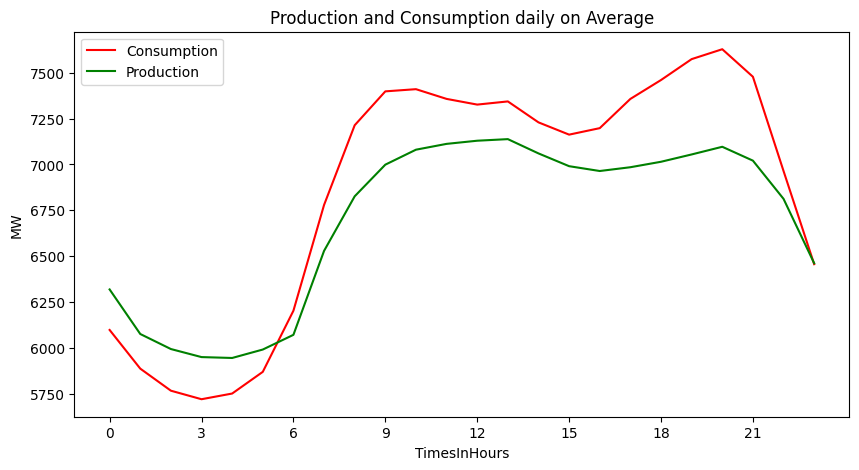

In [27]:

# visualization:
plt.figure(figsize=(10,5))
plt.plot(df02byHour.index,df02byHour.Consumption,"r")
plt.plot(df02byHour.index,df02byHour.Production,"g")
plt.title("Production and Consumption daily on Average")
plt.legend(['Consumption','Production'])
plt.xticks(np.arange(0, 24, step=3))
plt.ylabel("MW")
plt.xlabel("TimesInHours")


In [28]:

# delete the feature to use the mean values of the week afterwards
df02.drop(columns="TimesInHours",inplace=True)


In [29]:

# analysis of the weekdays --> create a feature "WeekDay"
df02['WeekDay'] = df02.DateTime.dt.day_name()


In [30]:

df02.sample(5)


,DateTime,Consumption,Production,WeekDay
7056,2019-10-22 01:00:00,5756,5564,Tuesday
4201,2019-06-25 02:00:00,5628,6455,Tuesday
2574,2019-04-18 07:00:00,7270,7424,Thursday
1116,2019-02-16 12:00:00,7644,7686,Saturday
7254,2019-10-30 07:00:00,7476,6936,Wednesday


In [31]:

# consumption and production --> average values by weekday
df02byDay = df02.groupby('WeekDay').mean()


In [32]:

# create the column "WeekDay" before setting the multiindex
df02byDay["WeekDay"] = df02byDay.index


In [33]:
df02byDay

,DateTime,Consumption,Production,WeekDay
WeekDay,,,,
Friday,2019-07-01 23:30:00.000000000,7092.322917,6828.960737,Friday
Monday,2019-07-04 23:30:00.000000000,6910.122596,6698.332532,Monday
Saturday,2019-07-02 23:30:00.000000000,6608.325321,6453.063301,Saturday
Sunday,2019-07-04 01:19:32.093023232,6062.339214,6154.912590,Sunday
Thursday,2019-06-30 23:30:00.000000000,7125.673878,6886.918269,Thursday
Tuesday,2019-07-02 11:30:00.000000000,7098.525157,6859.519654,Tuesday
Wednesday,2019-06-29 23:30:00.000000000,7115.951923,6962.385417,Wednesday


In [34]:

# --> set a multiindex with the right order of the days:
df02byDay.set_index(keys=[pd.Index([4,0,5,6,3,1,2]), "WeekDay"],inplace=True)


In [35]:

# sorting the new order:
df02byDay.sort_index(inplace=True)


In [36]:
df02byDay

,,DateTime,Consumption,Production
,WeekDay,,,
0,Monday,2019-07-04 23:30:00.000000000,6910.122596,6698.332532
1,Tuesday,2019-07-02 11:30:00.000000000,7098.525157,6859.519654
2,Wednesday,2019-06-29 23:30:00.000000000,7115.951923,6962.385417
3,Thursday,2019-06-30 23:30:00.000000000,7125.673878,6886.918269
4,Friday,2019-07-01 23:30:00.000000000,7092.322917,6828.960737
5,Saturday,2019-07-02 23:30:00.000000000,6608.325321,6453.063301
6,Sunday,2019-07-04 01:19:32.093023232,6062.339214,6154.912590


In [37]:

# i need the second value of the multiindex-tuple:
df02byDay.index.get_level_values(1)


Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object', name='WeekDay')

Text(0.5, 0, 'Weekdays')

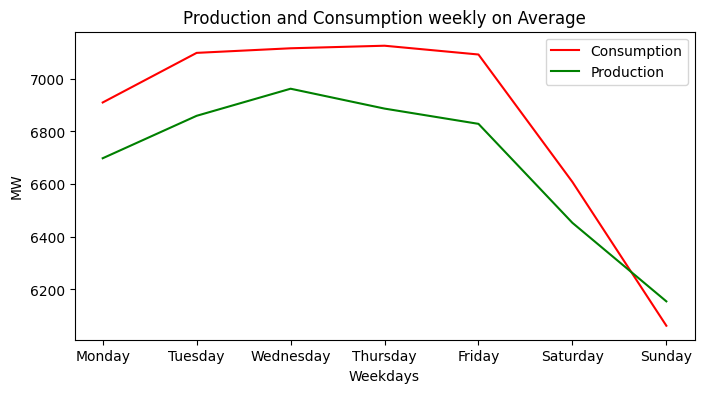

In [38]:

# visualization:
plt.figure(figsize=(8,4))
plt.plot(df02byDay.index.get_level_values(1),df02byDay.Consumption,"r")
plt.plot(df02byDay.index.get_level_values(1),df02byDay.Production,"g")
plt.title("Production and Consumption weekly on Average")
plt.legend(['Consumption','Production'])
plt.ylabel("MW")
plt.xlabel("Weekdays")


In [39]:

# analysis of the months --> create a feature "Month"
df02['Month'] = df02.DateTime.dt.month_name()


In [40]:

# delete the feature to use the mean values of the months afterwards
df02.drop(columns="WeekDay",inplace=True)


In [41]:
df02.Month.value_counts()

Month
January      744
May          744
July         744
August       744
October      744
December     744
March        743
April        720
June         720
September    720
November     720
February     672
Name: count, dtype: int64

In [42]:
df02

,DateTime,Consumption,Production,Month
0,2019-01-01 00:00:00,6352,6527,January
1,2019-01-01 01:00:00,6116,5701,January
2,2019-01-01 02:00:00,5873,5676,January
3,2019-01-01 03:00:00,5682,5603,January
4,2019-01-01 04:00:00,5557,5454,January
...,...,...,...,...
8754,2019-12-31 19:00:00,7719,7953,December
8755,2019-12-31 20:00:00,7491,7741,December
8756,2019-12-31 21:00:00,7065,7279,December
8757,2019-12-31 22:00:00,6777,7026,December


In [43]:

# consumption and production --> average values by month
df02byMonth = df02.groupby('Month').mean()


In [44]:

# create the column "Month" before setting the multiindex
df02byMonth["Month"] = df02byMonth.index


In [45]:
df02byMonth

,DateTime,Consumption,Production,Month
Month,,,,
April,2019-04-15 23:30:00.000000000,6652.491667,6707.433333,April
August,2019-08-16 11:30:00.000000000,6601.303763,5908.698925,August
December,2019-12-16 11:30:00.000000000,7193.911290,6998.693548,December
February,2019-02-14 23:30:00.000000000,7605.071429,7625.120536,February
January,2019-01-16 11:30:00.000000000,7752.168011,7367.438172,January
July,2019-07-16 11:30:00.000000000,6598.635753,6349.684140,July
June,2019-06-15 23:30:00.000000000,6495.806944,7089.390278,June
March,2019-03-16 11:01:36.904441600,6992.792732,7048.169583,March
May,2019-05-16 11:30:00.000000000,6379.282258,6705.147849,May


In [46]:

# --> set a multiindex with the right order of the months:
df02byMonth.set_index(keys=[pd.Index([3,7,11,1,0,6,5,2,4,10,9,8]), "Month"],inplace=True)


In [47]:

# sorting the new order:
df02byMonth.sort_index(inplace=True)


In [48]:
df02byMonth

,,DateTime,Consumption,Production
,Month,,,
0,January,2019-01-16 11:30:00.000000000,7752.168011,7367.438172
1,February,2019-02-14 23:30:00.000000000,7605.071429,7625.120536
2,March,2019-03-16 11:01:36.904441600,6992.792732,7048.169583
3,April,2019-04-15 23:30:00.000000000,6652.491667,6707.433333
4,May,2019-05-16 11:30:00.000000000,6379.282258,6705.147849
5,June,2019-06-15 23:30:00.000000000,6495.806944,7089.390278
6,July,2019-07-16 11:30:00.000000000,6598.635753,6349.684140
7,August,2019-08-16 11:30:00.000000000,6601.303763,5908.698925
8,September,2019-09-15 23:30:00.000000000,6416.876389,5721.358333


In [49]:

# i need the second value of the multiindex-tuple:
df02byMonth.index.get_level_values(1)


Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Month')

Text(0.5, 0, '2019')

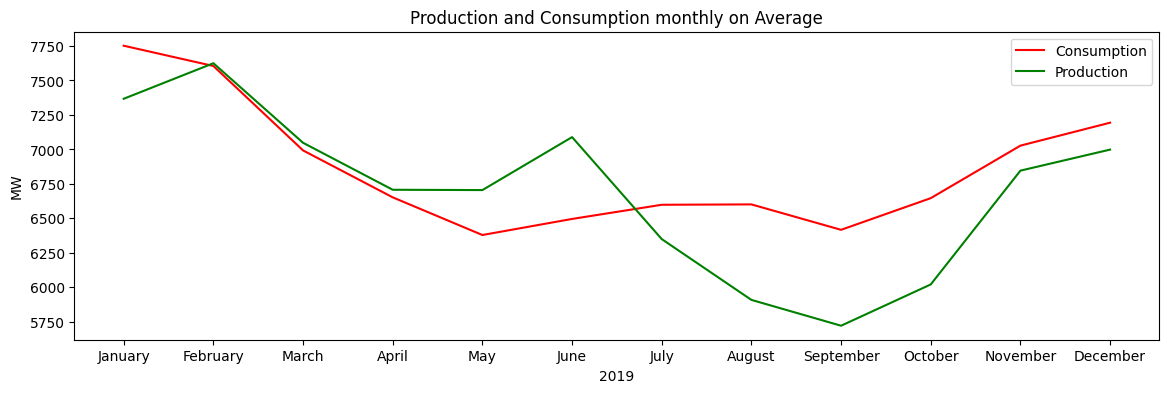

In [50]:

# visualization:
plt.figure(figsize=(14,4))
plt.plot(df02byMonth.index.get_level_values(1),df02byMonth.Consumption,"r")
plt.plot(df02byMonth.index.get_level_values(1),df02byMonth.Production,"g")
plt.title("Production and Consumption monthly on Average")
plt.legend(['Consumption','Production'])
plt.ylabel("MW")
plt.xlabel("2019")


In [51]:

# data over all years of the data set:
df03 = df01.iloc[:,:3]


In [52]:

# convert to an date-format:
df03.DateTime = pd.to_datetime(df03.DateTime)


In [53]:

df03.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36764 entries, 0 to 36763
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     36764 non-null  datetime64[ns]
 1   Consumption  36764 non-null  int64         
 2   Production   36764 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 861.8 KB


Text(0.5, 0, 'Years')

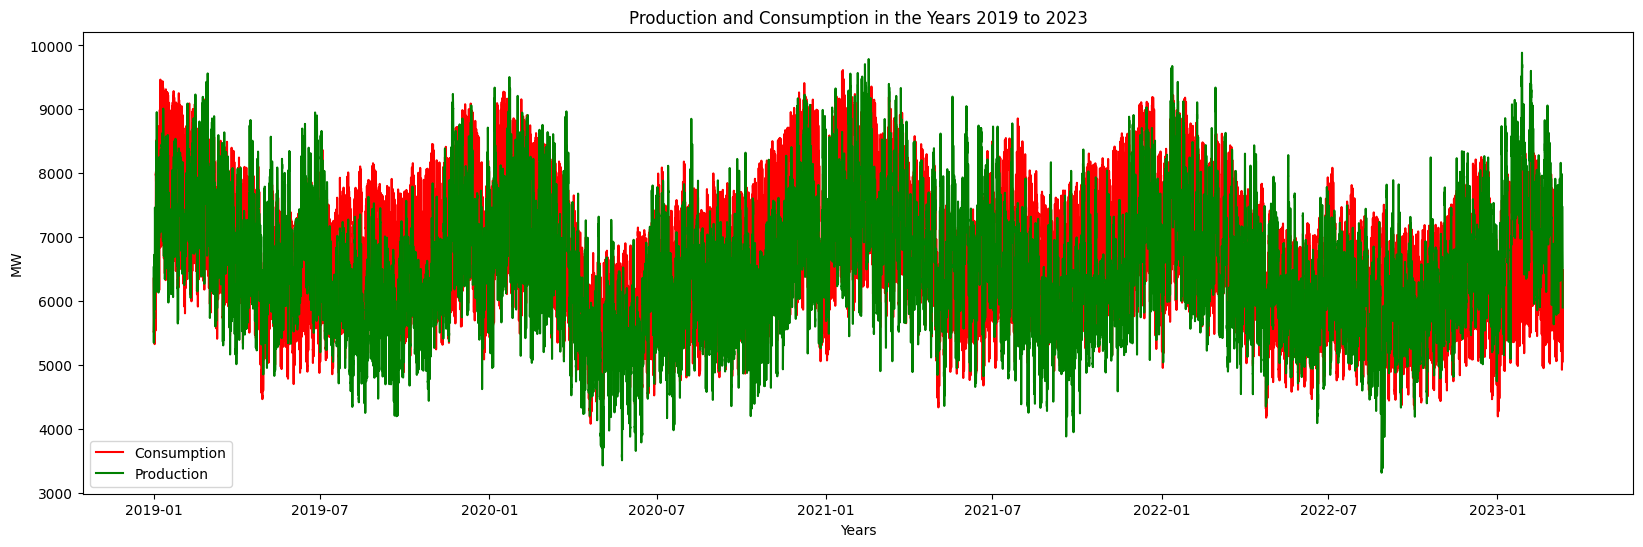

In [54]:

# visualization:
plt.figure(figsize=(20,6))
plt.plot(df03.DateTime,df03.Consumption,"r")
plt.plot(df03.DateTime,df03.Production,"g")
plt.title("Production and Consumption in the Years 2019 to 2023")
plt.legend(['Consumption','Production'])
plt.ylabel("MW")
plt.xlabel("Years")


In [55]:

# analysis of the years --> create a feature "Year"
df03['Year'] = df03.DateTime.dt.year


In [56]:
df03

,DateTime,Consumption,Production,Year
0,2019-01-01 00:00:00,6352,6527,2019
1,2019-01-01 01:00:00,6116,5701,2019
2,2019-01-01 02:00:00,5873,5676,2019
3,2019-01-01 03:00:00,5682,5603,2019
4,2019-01-01 04:00:00,5557,5454,2019
...,...,...,...,...
36759,2023-03-12 19:00:00,6500,6643,2023
36760,2023-03-12 20:00:00,6471,6484,2023
36761,2023-03-12 21:00:00,6194,6413,2023
36762,2023-03-12 22:00:00,5708,6217,2023


In [57]:

# consumption and production --> average values by year
df03byYear = df03.groupby('Year').mean()


Text(0.5, 0, 'Years')

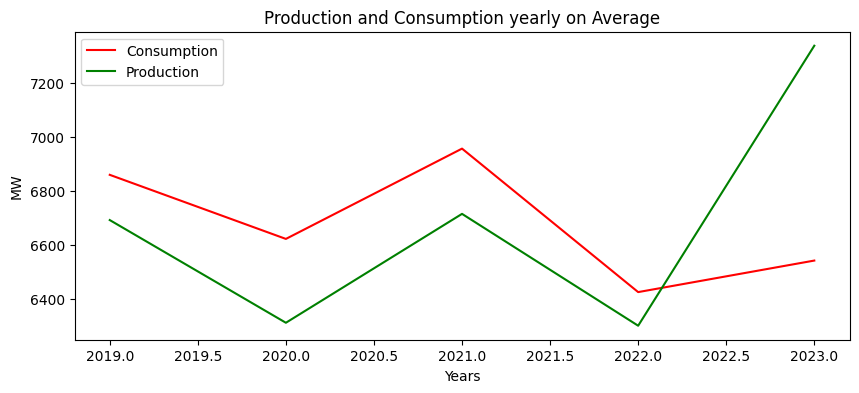

In [58]:

# visualization:
plt.figure(figsize=(10,4))
plt.plot(df03byYear.index,df03byYear.Consumption,"r")
plt.plot(df03byYear.index,df03byYear.Production,"g")
plt.title("Production and Consumption yearly on Average")
plt.legend(['Consumption','Production'])
plt.ylabel("MW")
plt.xlabel("Years")
